# Analysis of U20 lab-based replication

Load libraries and data in.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from numpy import * 

df = pd.read_csv('../data/test/ENGtest.csv')

Check that data were loaded correctly.

In [27]:
df.sample(10)

,age,buttonA,buttonB,buttonC,buttonD,cond,date,gender,iso,modInner,modOuter,nbMods,noun,post,response,responseButton,suj,trial,nounSing
111,21.0,suitcase wooden,wooden suitcase,NaN,NaN,dem-adj,2017-11-16 15:24,F,NaN,NaN,wooden,1,suitcase,1.0,suitcase wooden,0.0,ENG1003,11.0,suitcase
229,18.0,striped four spatulas,spatulas four striped,four striped spatulas,spatulas striped four,num-adj,2017-11-16 14:58,M,1.0,striped,four,2,spatulas,NaN,spatulas striped four,3.0,ENG1002,29.0,spatula
8,22.0,trays eight,eight trays,NaN,NaN,dem-num,2017-11-14 16:21,M,NaN,NaN,eight,1,trays,1.0,trays eight,0.0,ENG1001,8.0,tray
167,22.0,shoe that,that shoe,NaN,NaN,dem-num,2017-11-14 16:21,M,NaN,NaN,that,1,shoe,1.0,shoe that,0.0,ENG1001,17.0,shoe
101,21.0,pear that,that pear,NaN,NaN,dem-adj,2017-11-16 15:24,F,NaN,NaN,that,1,pear,1.0,pear that,0.0,ENG1003,1.0,pear
9,22.0,four those couches,couches four those,couches those four,those four couches,dem-num,2017-11-14 16:21,M,1.0,four,those,2,couches,NaN,couches four those,1.0,ENG1001,9.0,couch
233,18.0,dirty nine darts,darts nine dirty,darts dirty nine,nine dirty darts,num-adj,2017-11-16 14:58,M,1.0,dirty,nine,2,darts,NaN,darts dirty nine,2.0,ENG1002,33.0,dart
348,22.0,cows these eight,cows eight these,these eight cows,eight these cows,dem-num,2017-11-14 16:21,M,1.0,eight,these,2,cows,NaN,cows eight these,1.0,ENG1001,48.0,cow
260,21.0,blue this shirt,shirt this blue,shirt blue this,this blue shirt,dem-adj,2017-11-16 15:24,F,1.0,blue,this,2,shirt,NaN,shirt blue this,2.0,ENG1003,10.0,shirt
277,21.0,shoe spotted,spotted shoe,NaN,NaN,dem-adj,2017-11-16 15:24,F,NaN,NaN,spotted,1,shoe,1.0,shoe spotted,0.0,ENG1003,27.0,shoe


Note that these data are only from the testing phase, so unlike in the original experiment, no separation of the data is necessary.

Check how many participants we have in each condition:

In [3]:
df.groupby('cond').suj.nunique()

cond
dem-adj    1
dem-num    1
num-adj    1
Name: suj, dtype: int64

Check by participant accuracy on single-modifier trials.  The critical column is `post` denoting whether or not (1 or 0) a response was postnominal.

In [4]:
df[df.nbMods == 1].groupby(['suj', 'cond']).post.mean()

suj      cond   
ENG1001  dem-num    1.0
ENG1002  num-adj    1.0
ENG1003  dem-adj    1.0
Name: post, dtype: float64

Plot histogram of single-modifier trial accuracy.

suj      cond   
ENG1001  dem-num    AxesSubplot(0.125,0.125;0.775x0.755)
ENG1002  num-adj    AxesSubplot(0.125,0.125;0.775x0.755)
ENG1003  dem-adj    AxesSubplot(0.125,0.125;0.775x0.755)
Name: post, dtype: object

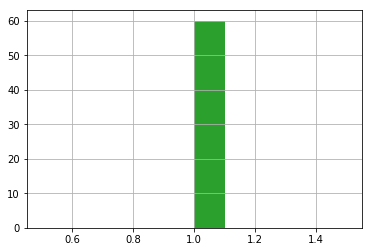

In [5]:
df[df.nbMods == 1].groupby(['suj', 'cond']).post.hist()

In [6]:
aggregators = {'iso':mean}

gp = df[df.nbMods == 2].groupby(['suj', 'cond'], as_index=False).agg(aggregators)

[(-0.05, 1.05)]

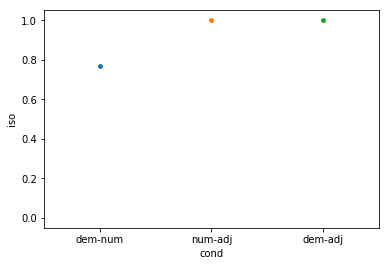

In [7]:
ax = sns.swarmplot(x='cond', y='iso', data=gp)
ax.set(ylim=(-0.05,1.05))

Prepare to do R modelling.

In [8]:
%load_ext rpy2.ipython

Load in data and create subsets on which each model will be run.

In [21]:
%%R
library('lme4')

d <- read.csv('../data/test/ENGtest.csv')
test <- subset(d, d$nbMods==2) # only select two modifier trials

testAdjDem <- subset(test, test$cond=="dem-adj")
testAdjNum <- subset(test, test$cond=="num-adj")
testNumDem <- subset(test, test$cond=="dem-num")

Run models for the adj-dem condition, and test whether intercept is significantly different from chance level.

In [24]:
%%R

m1AdjDem <- glmer(iso ~ 1 + (1|suj) + (1|nounSing), family=binomial, data=testAdjDem)
m0AdjDem <- glmer(iso ~ 0 + (1|suj) + (1|nounSing), family=binomial, data=testAdjDem)

anova(m1AdjDem, m0AdjDem)


Erreur : grouping factors must have > 1 sampled level


Run models for the adj-num condition, and test whether intercept is significantly different from chance level.

In [25]:
%%R

m1AdjNum <- glmer(iso ~ 1 + (1|suj) + (1|nounSing), family=binomial, data=testAdjNum)
m0AdjNum <- glmer(iso ~ 0 + (1|suj) + (1|nounSing), family=binomial, data=testAdjNum)

anova(m1AdjNum, m0AdjNum)


Erreur : grouping factors must have > 1 sampled level


Run models for the num-dem condition, and test whether intercept is significantly different from chance level.

In [26]:
%%R

m1NumDem <- glmer(iso ~ 1 + (1|suj) + (1|nounSing), family=binomial, data=testNumDem)
m0NumDem <- glmer(iso ~ 0 + (1|suj) + (1|nounSing), family=binomial, data=testNumDem)

anova(m1NumDem, m0NumDem)


Erreur : grouping factors must have > 1 sampled level
